 # Лабораторная работа №4: Классификация. Деревья решений



 Вечканова П.А., группа 6133-010402


## Задание:

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
2. Датасет и подготовка данных:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Нормализовать данные.
   - Разбить выборку на обучающую и тестовую.
     > Далее используем обучающую выборку, в том числе для метрик.
3. Дерево решений:
   - С использованием `GridSearchCV` осуществить подбор гиперпараметра `DecisionTreeClassifier` (как минимум `max_depth`, `max_features`, другие параметры - по желанию.)
   - Вывести значения гиперпараметра и метрик для наилучшей модели `DecisionTreeClassifier` ($accuracy$, $precision$, $recall$, $\textit{f-measure}$).
   - Для полученного наилучшего дерева вывести `feature_importances`, отсортировать их по убыванию.
   - Осуществить фильтрацию признаков (по какому-нибудь значению порога важности признака).
   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.
   - Вывести полученные гиперпараметры лучшей модели.
   - Сравнить метрики до и после фильтрации признаков лучших моделей.
4. Случайный лес
   - Построить случайный лес (`RandomForestClassifier`), c использованием `GridSearchCV` осуществить подбор гиперпараметра.
   - Вывести полученные гиперпараметры лучшей модели случайного леса.
   - Осуществить фильтрацию признаков.
   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.
   - Вывести полученные гиперпараметры лучшей модели случайного леса.
   - Сравнить метрики до и после фильтрации признаков лучших моделей.
5. Метод ближайших соседей:
   - С использованием `GridSearchCV` осуществить подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`).
   - Вывести значения гиперпараметра и метрик для наилучшей модели.
   - Осуществить фильтрацию признаков.
   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.
   - Вывести полученные гиперпараметры лучшей модели случайного леса.
   - Сравнить метрики до и после фильтрации признаков.
6. Если наблюдается улучшение метрик после фильтрации признаков хотя бы для одной из моделей, то для набора отфильтрованных признаков (пересечение множеств отфильтрованных признаков каждой модели или объединение множеств &ndash; не особо важно, главное описать, каким образом получен новый subset данных) заново построить наилучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, сравнить модели в пункте 7 на одинаковом полученном наборе отфильтрованных признаков. Иначе &ndash; пропустить этот пункт.
7. Оценка качества построенных моделей:
   - Визуализировать любое полученное дерево решений.
     > Для вывода названий признаков в граф необходимо задать значение аргумента `feature_names` в `sklearn.tree.export_graphviz`, для вывода названий классов &ndash; `class_names` (перед кодированием целевого признака можно сохранить названия в отдельный массив).
   - Сравнить лучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier` на **тестовой выборке**. Привести значения метрик $accuracy$, $precision$, $recall$, $\textit{f-measure}$.

### 1. Считать в `pandas.dfFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [129]:
import pandas as pd

df = pd.read_csv("/content/Star3642_balanced.csv")

df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


### 2. Датасет и подготовка данных:

#### - Привести описание датасета.

Датасет содержит признаки:

| Признак     | Описание                                                                 |
|-------------|--------------------------------------------------------------------------|
| Vmag        | Видимая звёздная величина (чем меньше значение, тем ярче звезда)          |
| Plx         | Параллакс звезды (используется для расчёта расстояния до звезды в парсеках) |
| e_Plx       | Стандартная ошибка параллакса (рекомендуется удалить строки с высокой погрешностью) |
| B-V         | Цветовой индекс B-V (0 или отрицательный — горячие звёзды, 2.0 — холодные) |
| SpType      | Спектральный класс звезды (например, K3III, B1II, G3III и т.д.)           |
| Amag        | Абсолютная звёздная величина (яркость звезды на стандартном расстоянии 10 пк) |
| TargetClass | Класс звезды: 0 — карлик, 1 — гигант                                      |

#### - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".

In [130]:
df = df.dropna()

####    - Закодировать категориальные признаки при необходимости.


In [131]:
df = pd.get_dummies(df, columns=["SpType"], drop_first=True)

###    - Нормализовать данные.


In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

####    - Разбить выборку на обучающую и тестовую.

In [133]:
from sklearn.model_selection import train_test_split

X = df.drop("TargetClass", axis=1)
y = df["TargetClass"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

## 3. Дерево решений:

  ### - С использованием `GridSearchCV` осуществить подбор гиперпараметра `DecisionTreeClassifier` (как минимум `max_depth`, `max_features`, другие параметры - по желанию.)

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'max_features': [None, 'sqrt', 'log2']
}
gs_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')
gs_tree.fit(X_train, y_train)
print('DecisionTree best params:', gs_tree.best_params_)

DecisionTree best params: {'max_depth': None, 'max_features': None}


### - Вывести значения гиперпараметра и метрик для наилучшей модели `DecisionTreeClassifier` ($accuracy$, $precision$, $recall$, $\textit{f-measure}$).

In [135]:
y_pred_train = gs_tree.predict(X_train)
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train, average='macro'))
print('Recall:', recall_score(y_train, y_pred_train, average='macro'))
print('F1-score:', f1_score(y_train, y_pred_train, average='macro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### - Для полученного наилучшего дерева вывести `feature_importances`, отсортировать их по убыванию.

In [136]:
tree_imp = pd.Series(gs_tree.best_estimator_.feature_importances_, index=X.columns)
tree_imp = tree_imp.sort_values(ascending=False)
print(tree_imp)

B-V                0.526702
Amag               0.149376
SpType_G8III/IV    0.025425
SpType_G8IV        0.021317
SpType_F0III       0.017005
                     ...   
SpType_F4II        0.000000
SpType_F4II-III    0.000000
SpType_F4Iab:      0.000000
SpType_F4V         0.000000
SpType_F5V:        0.000000
Length: 588, dtype: float64


### - Осуществить фильтрацию признаков (по какому-нибудь значению порога важности признака).

In [137]:
threshold = 0.01
selected_tree = tree_imp[tree_imp > threshold].index.tolist()
print('Selected features (Tree):', selected_tree)

Selected features (Tree): ['B-V', 'Amag', 'SpType_G8III/IV', 'SpType_G8IV', 'SpType_F0III', 'SpType_K1IV', 'e_Plx', 'SpType_K0III/IV']


###    - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.

In [138]:
X_train_tree = X_train[selected_tree]
gs_tree_sel = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')
gs_tree_sel.fit(X_train_tree, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2']},
             scoring='f1_macro')

### - Вывести полученные гиперпараметры лучшей модели.

In [139]:
print('Tree params after selection:', gs_tree_sel.best_params_)

Tree params after selection: {'max_depth': 5, 'max_features': None}


### - Сравнить метрики до и после фильтрации признаков лучших моделей.


In [140]:
y_pred_train = gs_tree_sel.predict(X_train_tree)
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train, average='macro'))
print('Recall:', recall_score(y_train, y_pred_train, average='macro'))
print('F1-score:', f1_score(y_train, y_pred_train, average='macro'))

Accuracy: 0.929776382895253
Precision: 0.929782433372529
Recall: 0.9297771416258811
F1-score: 0.9297762099675485


Метрики не улучшились

## 4. Случайный лес

###   - Построить случайный лес (`RandomForestClassifier`), c использованием `GridSearchCV` осуществить подбор гиперпараметра.


In [141]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1_macro')
gs_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

###   - Вывести полученные гиперпараметры лучшей модели случайного леса.


In [142]:
print('RandomForest best params:', gs_rf.best_params_)

RandomForest best params: {'max_depth': None, 'n_estimators': 300}


###   - Осуществить фильтрацию признаков.


In [143]:
tree_rf_imp = pd.Series(gs_rf.best_estimator_.feature_importances_, index=X.columns)
tree_rf_imp = tree_rf_imp.sort_values(ascending=False)
sel_rf = tree_rf_imp[tree_rf_imp > threshold].index.tolist()
print('Selected features (RF):', sel_rf)

Selected features (RF): ['B-V', 'Amag', 'Plx', 'Vmag', 'e_Plx', 'SpType_K0III', 'SpType_K1III', 'SpType_G8III', 'SpType_K2III', 'SpType_G8III/IV']


###   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.


In [144]:
X_train_rf = X_train[sel_rf]
gs_rf_sel = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1_macro')
gs_rf_sel.fit(X_train_rf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

###   - Вывести полученные гиперпараметры лучшей модели случайного леса.


In [145]:
print('RF params after selection:', gs_rf_sel.best_params_)

RF params after selection: {'max_depth': 10, 'n_estimators': 100}


###   - Сравнить метрики до и после фильтрации признаков лучших моделей.

In [146]:
y_train_rf_pred = gs_rf.predict(X_train)
print('Before selection RF')
print('Accuracy:', accuracy_score(y_train, y_train_rf_pred))
print('Precision:', precision_score(y_train, y_train_rf_pred, average='macro'))
print('Recall:', recall_score(y_train, y_train_rf_pred, average='macro'))
print('F1-score:', f1_score(y_train, y_train_rf_pred, average='macro'))

Before selection RF
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [147]:
y_pred_train = gs_rf_sel.predict(X_train_rf)
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train, average='macro'))
print('Recall:', recall_score(y_train, y_pred_train, average='macro'))
print('F1-score:', f1_score(y_train, y_pred_train, average='macro'))

Accuracy: 0.9595919968615143
Precision: 0.9596381343607968
Recall: 0.9595939914427309
F1-score: 0.9595911012908986


Метрики ухудшились


## 5. Метод ближайших соседей:


###   - С использованием `GridSearchCV` осуществить подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`).


In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': list(range(3, 11))}
gs_knn = GridSearchCV(KNeighborsClassifier(), knn_params,
                      cv=5, scoring='f1_macro')
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

   ### - Вывести значения гиперпараметра и метрик для наилучшей модели.


In [149]:
print('KNN best params:', gs_knn.best_params_)

KNN best params: {'n_neighbors': 3}


  ### - Осуществить фильтрацию признаков.


In [150]:
common_feats = list(set(selected_tree) & set(sel_rf))
print('Common features for KNN:', common_feats)

Common features for KNN: ['Amag', 'e_Plx', 'B-V', 'SpType_G8III/IV']


  ### - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.


In [151]:
gs_knn_sel = GridSearchCV(KNeighborsClassifier(), knn_params,
                           cv=5, scoring='f1_macro')
gs_knn_sel.fit(X_train[common_feats], y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

 ###  - Вывести полученные гиперпараметры лучшей модели случайного леса.


In [152]:
print('After selection KNN params:', gs_knn_sel.best_params_)

After selection KNN params: {'n_neighbors': 9}


###   - Сравнить метрики до и после фильтрации признаков.

In [153]:
y_train_knn_pred = gs_knn.predict(X_train)
print('Before selection KNN')
print('Accuracy:', accuracy_score(y_train, y_train_knn_pred))
print('Precision:', precision_score(y_train, y_train_knn_pred, average='macro'))
print('Recall:', recall_score(y_train, y_train_knn_pred, average='macro'))
print('F1-score:', f1_score(y_train, y_train_knn_pred, average='macro'))

Before selection KNN
Accuracy: 0.9501765398195371
Precision: 0.9545330515585666
Recall: 0.9501957706159387
F1-score: 0.9500583536780558


In [154]:
y_train_knn_sel_pred = gs_knn_sel.predict(X_train[common_feats])
print('After selection KNN')
print('Accuracy:', accuracy_score(y_train, y_train_knn_sel_pred))
print('Precision:', precision_score(y_train, y_train_knn_sel_pred, average='macro'))
print('Recall:', recall_score(y_train, y_train_knn_sel_pred, average='macro'))
print('F1-score:', f1_score(y_train, y_train_knn_sel_pred, average='macro'))

After selection KNN
Accuracy: 0.9144762652020401
Precision: 0.914480739751159
Recall: 0.9144756364084096
F1-score: 0.9144759361317554


Метрики ухудшились

## 7. Оценка качества построенных моделей:


###  - Визуализировать любое полученное дерево решений.


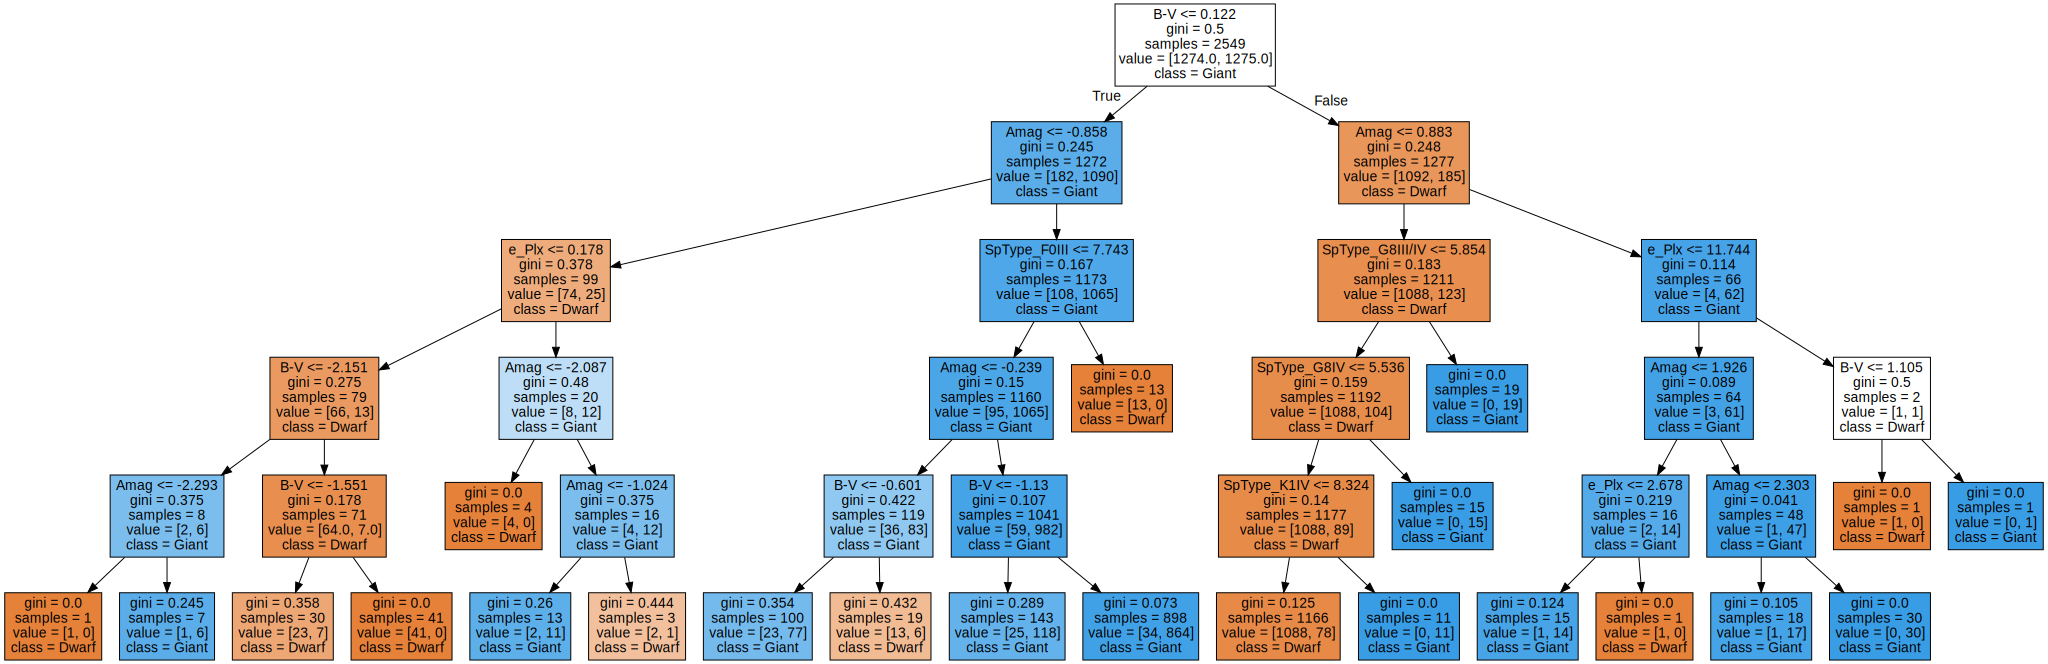

In [155]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    gs_tree_sel.best_estimator_,
    out_file='tree.dot',
    feature_names=selected_tree,
    class_names=['Dwarf', 'Giant'],
    filled=True
)
graphviz.Source(open('tree.dot').read())

 ###  - Сравнить лучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier` на **тестовой выборке**. Привести значения метрик $accuracy$, $precision$, $recall$, $\textit{f-measure}$.

In [156]:
from sklearn.metrics import classification_report, accuracy_score

# Decision Tree
print('Decision Tree on selected features:')
print('Accuracy:', accuracy_score(y_test, gs_tree.predict(X_test)))
print(classification_report(y_test, gs_tree.predict(X_test)))

# Random Forest
print('Random Forest on selected features:')
print('Accuracy:', accuracy_score(y_test, gs_rf.predict(X_test)))
print(classification_report(y_test, gs_rf.predict(X_test)))

# KNN
print('KNN on common features:')
print('Accuracy:', accuracy_score(y_test, gs_knn.predict(X_test)))
print(classification_report(y_test, gs_knn.predict(X_test)))


Decision Tree on selected features:
Accuracy: 0.9478499542543458
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       547
           1       0.95      0.95      0.95       546

    accuracy                           0.95      1093
   macro avg       0.95      0.95      0.95      1093
weighted avg       0.95      0.95      0.95      1093

Random Forest on selected features:
Accuracy: 0.939615736505032
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       547
           1       0.94      0.94      0.94       546

    accuracy                           0.94      1093
   macro avg       0.94      0.94      0.94      1093
weighted avg       0.94      0.94      0.94      1093

KNN on common features:
Accuracy: 0.9149130832570905
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       547
           1       1.00      0.83      0.91       546



Наилучшей моделью на тестовой выборке оказалась Decision Tree